# Introduction à BioPython - Exercice

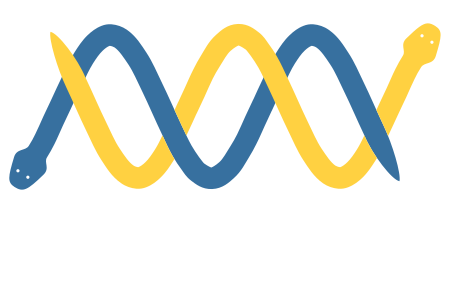

Cet exercice mettra en œuvre les concepts de base de **BioPython** abordés durant le cours aujourd'hui.

Le fichier *Anolis.fas* présent sur le **[GitHub](https://github.com/ThBret/IntroBioinfo3)** comprend une cinquentaine de séquences nucléotidiques correspondant à des gènes biomarqueurs. Dans le contexte de l'identification moléculaire, un biomarqueur est une courte séquence ADN distinctive qui varie suffisamment entre espèces pour permettre la caractérisation génétique d'espèces distinctes. 

Les séquences du fichier *Anolis.fas* sont extraites de membres d'*Anolis*, un genre de lézards arboricoles originaires d'Amérique.

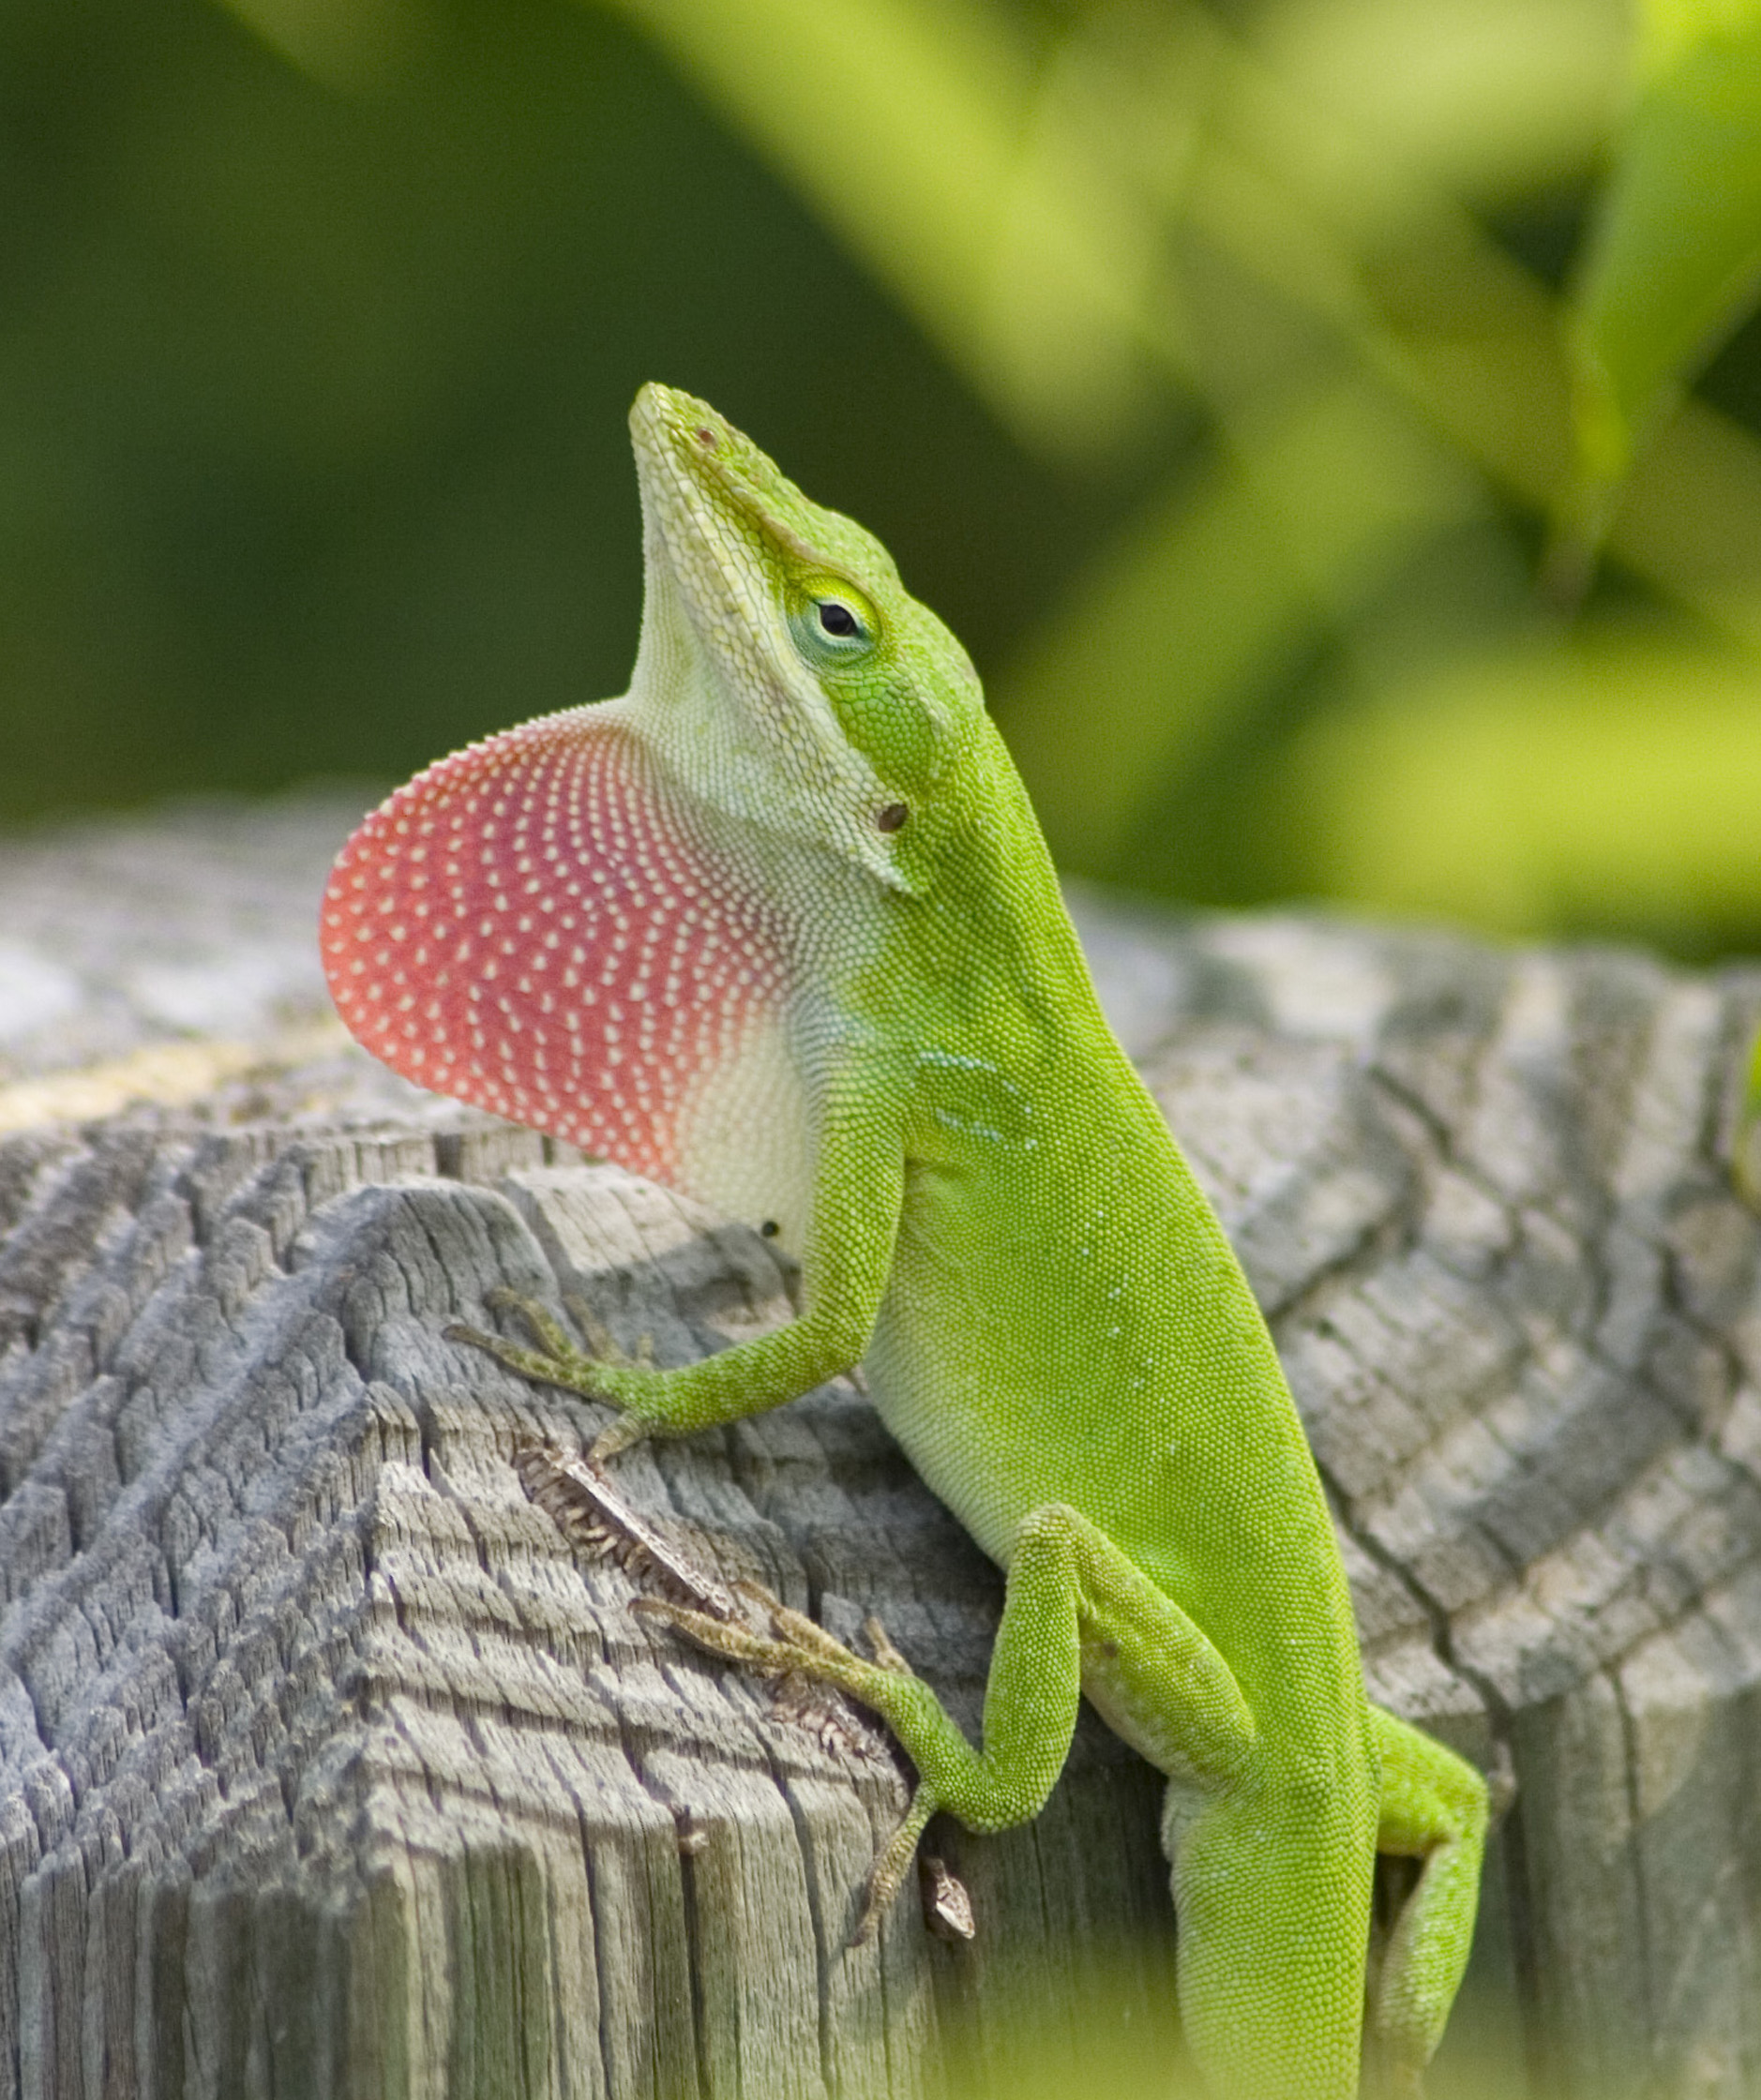
Spécimen d'*Anolis carolinensis*

### Partie 1 : Lecture et inspection du fichier FASTA

Commençons par importer les modules nécessaires et lire le fichier.

In [65]:
from Bio.Seq import Seq
from Bio import SeqIO
from Bio.SeqUtils import gc_fraction
import pandas as pd

# Cacher les avertissements
import warnings
warnings.filterwarnings('ignore')

# Charger le fichier FASTA
fichier_fasta = 'Anolis.fas'
séquences = list(SeqIO.parse(fichier_fasta, 'fasta'))

# Aperçu de la première entrée
print(séquences[0])

ID: SQUAP510-16|Anolis
Name: SQUAP510-16|Anolis
Description: SQUAP510-16|Anolis humilis|COI-5P|MH139994
Number of features: 0
Seq('CTTTACTTAATCTTTGGGGCCTGGGCTGGGATAGTTGGTACAGCCTTAAGCCTG...TTC')


#### A) Afficher le nombre de séquences

In [66]:
print(f'Nombre de séquences dans le fichier : {...(séquences)}')

<class 'TypeError'>: 'ellipsis' object is not callable

### Partie 2 : Extraction de données

#### B) Extraire les noms d'espèces et biomarqueurs

Il pourrait être utile de voir à quoi ressemble les descriptions de chaque entrée du fichier FASTA en imprimant la description de la première entrée (`print(séquences[0].description)`) afin d'extraire le nom de l'espèce et du biomarqueur (le gène auquel correspond chaque séquence).

In [67]:
# Aperçu de la description de la première séquence du fichier
print(séquences[...]....)

<class 'SyntaxError'>: invalid syntax. Perhaps you forgot a comma? (<ipython-input-67-ec98a638f1d1>, line 2)

Ne pas oublier qu'avec Python, l'indexation commence à 0.

`SQUAP510-16|Anolis humilis|COI-5P|MH139994`

Ici, l'identifiant unique de la séquence "SQUAP510-16" pourra être extrait avec `seq.description.split('|')[0]`

In [68]:
# Extraire les noms d'espèces
espèces = [seq.description.split('|')[...] for seq in séquences]

# Extraire les biomarqueurs
biomarq = [seq.description.split('|')[...] for seq in séquences]

<class 'TypeError'>: list indices must be integers or slices, not ellipsis

#### C) Extraire le reste des informations

In [69]:
# Extraire les indentifiants uniques
ids = [seq.id.split('|')[0] for seq in séquences]

# Extraire les séquences
seqs = [str(seq.seq) for ... in ...] # obligation de convertir la séquence en texte ou "string"
                                           # pour l'intégrer dans le DataFrame (le tableau)

# Extraire la longueur de chaque séquence
lens = [...(seq.seq) for ... in ...]

<class 'SyntaxError'>: cannot assign to ellipsis (<ipython-input-69-9a3f04836df6>, line 5)

#### D) Convertir en DataFrame (tableau)

La fonction Python `apply()`permet d'appliquer une fonction à chaque élément d'un DataFrame. Pour ajouter une colonne correspondant au taux de guanine/cytosine (ratio GC), il faudra employer une fonction vue dans le cours.

In [70]:
# Convertir les informations prélevées en DataFrame
séquences_df = pd.DataFrame({'id':ids, 'espèce':espèces, 'seq':seqs,
                             'biomarqueur':biomarq, 'len':lens}).set_index('id')

# Ajouter une colonne calculant le taux de GC dans chaque séquence
séquences_df['ratio_gc'] = séquences_df['seq'].apply(...)

# Remplacer tous les "-" par "N" dans la colonne "seq"
séquences_df['seq'] = séquences_df['seq'].str.replace(..., ...)

<class 'TypeError'>: 'ellipsis' object is not callable

#### E) Aperçu du DataFrame

In [71]:
print(....head())

<class 'AttributeError'>: 'ellipsis' object has no attribute 'head'

### Partie 3 : Analyse des séquences

#### F) Calculer la longueur moyenne des séquences

In [72]:
print(séquences_df[...].mean())

<class 'KeyError'>: Ellipsis

#### G) Identifier la séquence la plus longue
L'attribut Python `.loc` permet de sélectionner la ligne entière correspondant à une valeur de l'index d'un DataFrame. Ici les valeurs dans l'index correspondent à l'identifiant unique d'une séquence. Pour extraire chaque information correspondant à un identifiant unique, on peut donc utiliser `print(séquences_df.loc[id])` si `id` correspondant à l'identifiant unique.

In [73]:
# Identifier la valeur maximale dans la colonne "len"
print(séquences_df[...].max())

# Identifier l'identifiant unique correspondant à la séquence ayant la plus grande valeur "len"
id_max = ...[...].idxmax()

# Imprimer toutes les informations correspondant à cette même séquence
print(....loc[...])

<class 'KeyError'>: Ellipsis

#### H) Identifier la séquence la plus courte

On pourra utiliser `min()` et `idxmin()` pour identifier la valeur minimale d'une colonne.

In [74]:
# Identifier la valeur minimale dans la colonne "len"
print(...)

# Identifier l'identifiant unique correspondant à la séquence ayant la plus petite valeur "len"
id_min = ...

# Imprimer toutes les informations correspondant à cette même séquence
print(...)

Ellipsis
Ellipsis


#### I) Déterminer la composition en nucléotides (A, C, G et T) d'une séquence

In [76]:
# Composition en nucléotides pour la première séquence de "séquences_df"
entrée1 = séquences_df.iloc[0]

print('Composition en nucléotides pour la séquence', entrée1.name, ':')
for char in ['A','C','T','G']:
    print(char, ':', entrée1['seq'].count(...))

Composition en nucléotides pour la séquence SQUAP510-16 :
A : 158
C : 161
T : 212
G : 123


### Partie 4 : Filter les séquences

1) Garder uniquement les séquences correspondant au biomarqueur "COI-5P" (colonne "biomarqueur")
2) Retirer les séquences correspondant à une espèce indéfinie (indiquée par la présence du suffixe "sp." dans le nom de l'espèce)
3) Garder uniquement les séquences faisant plus de 600 caractères
4) Garder uniquement les séquences avec un taux de GC supérieur à 38%
5) Garder une seule séquence par espèce (la plus longue)

Combien d'entrées reste-t-il dans le DataFrame ?

In [77]:
# Étape 1 : Filtrer les séquences pour le biomarqueur "COI-5P"
...

# Étape 2 : Retirer les séquences pour lesquelles le nom d'espèce contient "sp."
...

# Étape 3 : Garder uniquement les séquences de plus de 600 caractères
...

# Étape 4 : Garder uniquement les séquences avec un taux de GC supérieur à 38%
...

# Étape 5 : Garder une seule séquence par espèce (la plus longue)
...

# Nombre d'entrées restantes dans le DataFrame
print("Nombre d'entrées restantes", ...(séquences_df))

<class 'pandas.errors.UndefinedVariableError'>: name 'ratio_gc' is not defined

### Partie 5 : Traduction en protéines

In [9]:
# Traduire les séquences en protéines
séquences_df['seq_protéine'] = [str(Seq(seq).translate()) for seq in séquences_df.seq]

# Afficher les séquences d'acides aminés après traduction
print(séquences_df.head(10)[...])

id
GBGCR848-15|Anolis     TLYLIFGA*AGIIGTGLSLLIRAELSQPGALLGDDQIYNVIVTAHA...
NMNHR1236-17|Anolis    PIPNFWCLSRHSWHCP*PSYPSRTEPTWGPTGRRSDLQRHRYSPRF...
NMNHR621-17|Anolis     PLLNFWCLGRNSGHSPELANSSRAKPARGPIRGRPDL*CGCYSPCL...
NMNHR553-17|Anolis     PVLNFWCLSGHGWHSPEPVNPSGAKPTRGPTRGRPNL*CYRNSPCL...
MJNV039-24|Anolis      NKIIKTSAPCT*SSGPGLE*LAQPLAF*SELS*ASRGPC*GMTKST...
NMNHR905-17|Anolis     PLFNFWCLSRHSRHSFKPPHSSRTKPTRGPLGRRPNL*CCCYSPCL...
GBGCR886-15|Anolis     HPILNLWRLGRNSRNGPKPSYSSRTKPTRGLIR**PNLQRYCYRPC...
NMNHR1418-17|Anolis    PLFNLWCLGRNSWNSLKLINSSRAKPTWGTTRRRSNL*CDRDSPCF...
SQUAP427-16|Anolis     LYLIFGA*AGMVGTGLSLLIRAELSQPGALLGDDQIYNVVVTAHAF...
NMNHR317-17|Anolis     PLPDFWCLGRHSRHRP*PPYSSGTKPAGGLTWR*PNL*RHCHSPRF...
Name: seq_protéine, dtype: object


### Partie 6 : Alignement
On peut ici remplacer les identifiants uniques par les noms d'espèce car on a conservé uniquement une séquence par espèce.

In [15]:
from Bio import AlignIO
from Bio.SeqRecord import SeqRecord

# Créer un object SeqRecord avec chaque entrée unique
entrées_uniques = [SeqRecord(seq = Seq(séquences_df['seq'].iloc[i]), id = séquences_df['espèce'][i])
                   for i in range(len(séquences_df))]

SeqIO.write(entrées_uniques, 'entrées_uniques.fasta', 'fasta')

<class 'ValueError'>: Sequences must all be the same length

* Téléchargez le fichier *entrées_uniques.fasta* sur votre ordinateur (clique-droit sur le nom du fichier, puis "Download").
* Rendez-vous sur le site **[Muscle](https://www.ebi.ac.uk/jdispatcher/msa/muscle?stype=protein)** pour réaliser l'alignement de cet ensemble de séquences.
* Appuyer sur le bouton *Choose file* et sélectionner le fichier *entrées_uniques.fasta*.

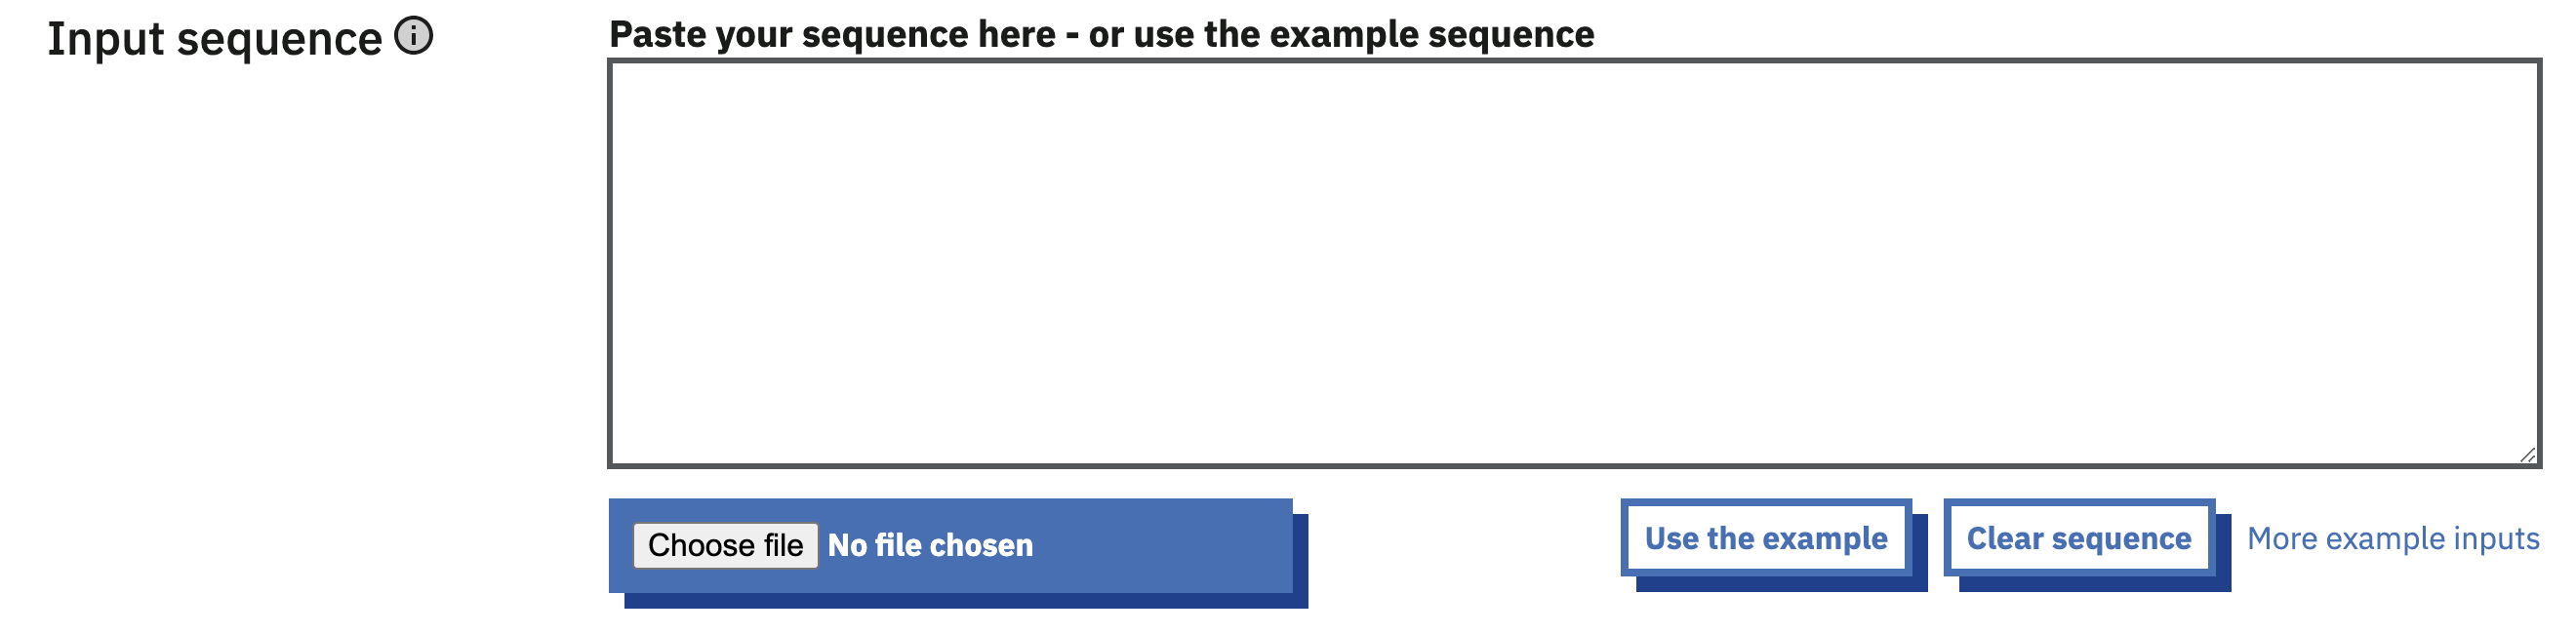

* Patientez quelques secondes.
* Appuyez sur le bouton *View Results*.
* Prenez le temps d'explorer la page des résultats.
* Dans la section "Alignement", choisissez la palette "nucleotide".

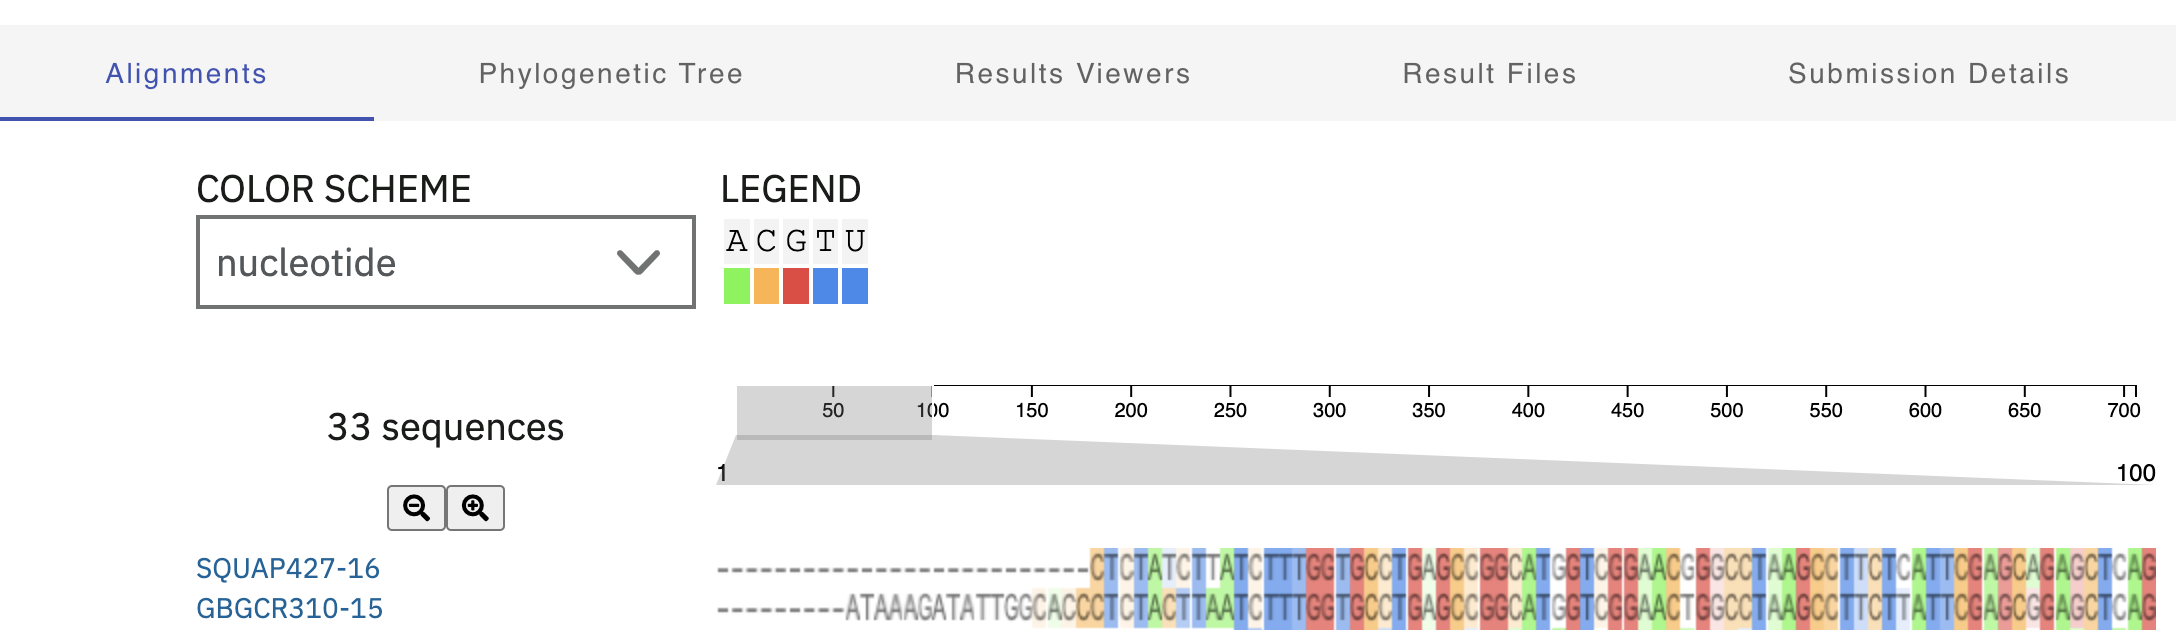

* Rendez-vous dans la section "Phylogenetic Tree". Descendez en bas de la page pour voir une représentation de l'arbre phylogénétique des espèces d'*Anolis*. Les espèces les plus proches sont celles dont la séquence était la plus similaire. Le gène *COI-5P* sur lequel est basé cet arbre est un biomarqueur fréquemment utilisé pour établir ce genre de relations entre espèces.

## Conclusion

Dans cet exercice, vous avez :
- Manipulé des fichiers FASTA avec **BioPython**.
- Effectué des analyses biologiques sur des séquences.
- Traduit des séquences nucléotidiques en protéines.
- Aligné des séquences traduites.
- Visualisé les résultats sous forme de graphiques et d'arbres phylogénétiques.

N'hésitez pas à explorer davantage et à poser des questions si besoin !